# TO RUN : importS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set(font_scale = 1.3, rc = {'figure.figsize':(10,6)})
sns.set_palette('colorblind')

# LOAD old dataset for 2017

In [2]:
def process_chunk(chunk):
        print(f'Processing chunk with {len(chunk)} rows')
        #display(chunk)

nblines_totquotes = 0
nbtot_totquotes = 0
with pd.read_json('data/quotes-2017.json.bz2', lines=True, compression='bz2', chunksize=10000) as df_reader:
    for chunk in df_reader:
        process_chunk(chunk)
        nblines_totquotes = nblines_totquotes + chunk.shape[0]
        nbtot_totquotes = nbtot_totquotes + chunk['numOccurences'].sum()
        break

Processing chunk with 10000 rows


KeyError: 'numOccurences'

The total nb of DIFFERENT quotes in the dataset for 2017 is : <br>
The total nb of quotes in the dataset for 2017 is :

# LOAD new dataset for 2017 (only 'gun quotes' by American speakers)

In [2]:
gunquotes = pd.read_json('data/quotes-2017-extended.json.bz2', lines=True, compression='bz2')
gunquotes

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,gender,nationality,occupation,age,ethnic_group,party,religion
0,2017-03-26-000661,"A big burglar, I never really knew him to carr...",Brian Andrews,"[Q2924842, Q4962982, Q4962983]",2017-03-26 17:01:19,1,"[[Brian Andrews, 0.7167], [Tony Fiore, 0.1666]...",[http://www.providencejournal.com/news/2017032...,E,male,[United States of America],[singer],41.0,None,None,None
1,2017-05-22-015293,"Congress, investigate Seth Rich Murder! @ Juli...",Sean Hannity,[Q557730],2017-05-22 14:40:47,3,"[[Sean Hannity, 0.8718], [None, 0.0946], [Kim ...",[http://news.yahoo.com/news/seth-rich-conspira...,E,male,[United States of America],"[radio personality, television presenter, jour...",59.0,None,[Conservative Party of New York State],[Catholicism]
2,2017-09-11-088873,similar rules for whether you can own a gun an...,Kris Kobach,[Q6437211],2017-09-11 22:17:52,2,"[[Kris Kobach, 0.5138], [John Lott, 0.3198], [...",[http://www.kansas.com/news/politics-governmen...,E,male,[United States of America],[lawyer],55.0,None,[Republican Party],None
3,2017-08-10-034688,He keeps getting better each day at practice. ...,Ruffin McNeill,[Q7377923],2017-08-10 01:00:45,1,"[[Ruffin McNeill, 0.7703], [None, 0.2297]]",[http://newsok.com/marquise-overton-expected-t...,E,male,[United States of America],"[head coach, American football player]",63.0,None,None,None
4,2017-11-19-055725,The easiest one is to make guns better for hom...,David Hemenway,[Q1107796],2017-11-19 14:50:20,1,"[[David Hemenway, 0.791], [None, 0.209]]",[http://www.wbur.org/npr/462252799/research-su...,E,male,[United States of America],"[economist, university teacher]",76.0,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36457,2017-10-04-005756,All things that make America safer and don't i...,Lindsey Graham,[Q22212],2017-10-04 21:19:20,1,"[[Lindsey Graham, 0.8846], [None, 0.1154]]",[http://www.wandtv.com/story/36523093/congress...,E,male,[United States of America],"[politician, air force officer, lawyer, county...",66.0,None,[Republican Party],[Southern Baptist Convention]
36458,2017-10-02-005046,already this year there have been more mass sh...,Chris Murphy,"[Q1077594, Q20022484, Q2964809, Q5107535, Q510...",2017-10-02 15:00:00,2,"[[Chris Murphy, 0.8709], [None, 0.12], [Elizab...",[http://commondreams.org/news/2017/10/02/messa...,E,male,[United States of America],"[politician, lawyer]",48.0,[Irish people],[Democratic Party],[Protestantism]
36459,2017-06-03-012435,"Evolution is also the basis of racism, [ and ]...",David Whitney,[Q215478],2017-06-03 00:00:00,3,"[[David Whitney, 0.6764], [None, 0.3236]]",[http://www.patheos.com/blogs/friendlyatheist/...,E,male,[United States of America],"[screenwriter, film director, film producer, j...",77.0,None,None,None
36460,2017-08-29-047666,I t's a movie about growing up and about gener...,Don Hahn,"[Q1072843, Q5292728]",2017-08-29 18:10:00,2,"[[Don Hahn, 0.8057], [None, 0.1943]]",[http://hellogiggles.com/reviews-coverage/movi...,E,male,[United States of America],"[film producer, screenwriter, film director, a...",65.0,None,None,None


In [5]:
nblines_gunquotes = gunquotes.shape[0]
nbtot_gunquotes = gunquotes['numOccurrences'].sum()
print(nblines_gunquotes)
print(nbtot_gunquotes)

36462
212199


The total nb of DIFFERENT 'gun quotes' in the dataset for 2017 is : 36462 <br>
The total nb of 'gun quotes' in the dataset for 2017 is : 212199

# First statistics
TASKS : <br>
-Faire nombre occurences dans les articles par rapport au nombre total d'articles (utiliser meme chiffre que pour timeline) -> Estelle <br>
-faire stats sur timeline: nombre occurences par mois pdt 1 ou 5 ans -> 2017 potentiellement à relier ac Las Vegas -> Estelle

<br>
Here, we try to extract a few basic statistics to make sure we have the necessary data to perform the project. Indeed, after selecting the quotations of interests (the ones related to arms in the USA), we want to make sure these datas are sufficiently numerous to perform an actual study on the right to bear arms in the USA. We also want to check if our research questions are reasonnnable and can be solved from our data. <br>
<br>
First, we get a sense of the quantity of actual quotations speaking about arms, and we compute its share in the total quotes dataset of 2017.

In [6]:
share_gunquotes = 100 * nblines_gunquotes / nblines_totquotes
sharetot_gunquotes = 100 * nbtot_gunquotes / nbtot_totquotes
print(share_gunquotes)
print(sharetot_gunquotes)

NameError: name 'nblines_totquotes' is not defined

   % of the DIFFERENT quotes are related to guns <br>
   % of the total quotes are related to guns   (both should be =)

### A first timeline on the 'gun quotes' (by American speakers)

In [25]:
## Date&Time commands that can be useful

gunquotes['date'].dtype
gunquotes['date'].dt.day
gunquotes['date'].dt.month
gunquotes['date'].dt.year
gunquotes['date'].dt.dayofweek
gunquotes['date'].dt.hour
gunquotes['date'].dt.minute
gunquotes['date'].dt.second
gunquotes['date'].dt.normalize()

0       2017-03-26
1       2017-05-22
2       2017-09-11
3       2017-08-10
4       2017-11-19
           ...    
36457   2017-10-04
36458   2017-10-02
36459   2017-06-03
36460   2017-08-29
36461   2017-02-15
Name: date, Length: 36462, dtype: datetime64[ns]

In [6]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

dateWithoutTime
1       591
2      4222
3     12014
4     16151
5     12107
6     43104
7     13109
8     16648
9     11135
10    41903
11    27478
12    13737
Name: numOccurrences, dtype: int64
212199


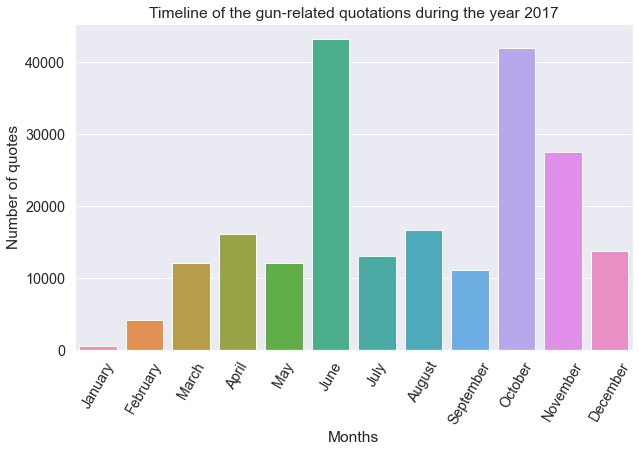

In [7]:
## Plot of the nb of quotes related to guns in function of the month

gunquotes['dateWithoutTime'] = gunquotes['date'].dt.normalize()

quotes_perMonth = gunquotes.groupby(gunquotes['dateWithoutTime'].dt.month).numOccurrences.sum()
print(quotes_perMonth)
print(quotes_perMonth.sum())
# ax = sns.barplot(x=gunquotes.groupby(gunquotes["dateWithoutTime"].dt.month), y=gunquotes.groupby(gunquotes['dateWithoutTime'].dt.month).numOccurrences.sum())#, data=gunquotes)
ax = sns.barplot(x=np.linspace(1,12,12), y=gunquotes.groupby(gunquotes['dateWithoutTime'].dt.month).numOccurrences.sum())#, data=gunquotes)
# ax = sns.barplot(x=quotes_perMonth.index, y=quotes_perMonth)
sns.set_color_codes("colorblind")
ax.set_xlabel('Months')
ax.set_ylabel('Number of quotes')
ax.set_title('Timeline of the gun-related quotations during the year 2017')
ax.set_xticklabels(labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xticks(rotation=60)
plt.show()
show_values(ax)


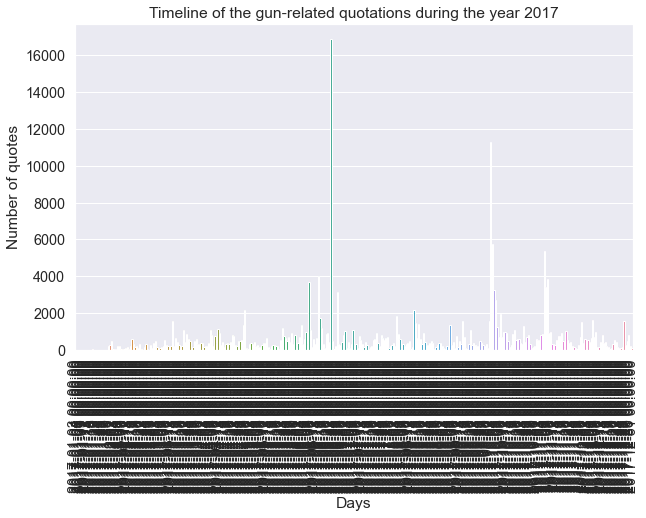

In [8]:
## Plot of the nb of quotes related to guns in function of the date

# print(gunquotes.groupby(gunquotes['dateWithoutTime']).numOccurrences.sum())
# print(gunquotes.groupby(gunquotes['dateWithoutTime']).numOccurrences.sum().sum())
# print(gunquotes.groupby(gunquotes['dateWithoutTime']).numOccurrences.sum().index)
# print(gunquotes.groupby(gunquotes['dateWithoutTime']).numOccurrences.sum().shape[0])
# print(str(print(gunquotes.groupby(gunquotes['dateWithoutTime']).numOccurrences.sum().index)))
labs = (gunquotes.groupby(gunquotes['dateWithoutTime']).numOccurrences.sum().index)
# print(labs)
ax = sns.barplot(x=np.linspace(1,356,356), y=gunquotes.groupby(gunquotes['dateWithoutTime']).numOccurrences.sum())#, data=gunquotes)
sns.color_palette("tab10")
ax.set_xlabel('Days')
ax.set_ylabel('Number of quotes')
ax.set_title('Timeline of the gun-related quotations during the year 2017')
ax.set_xticklabels(labels=labs)
ax.figsize = (15,10)
plt.xticks(rotation=90)
# show_values(ax)
plt.show()


# gunquotes['dateWithoutTime'] = gunquotes['date'].dt.normalize()
# ax = sns.barplot(x="dateWithoutTime", y="numOccurrences", data=gunquotes)
# ax.set_xlim(right='2017-04-01')

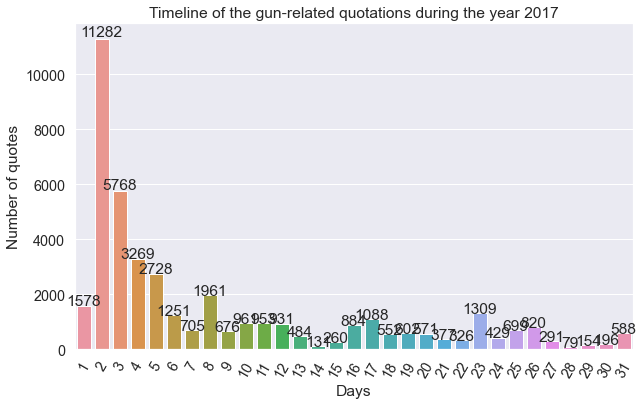

In [9]:
## Plot of the nb of quotes related to guns in function of the date : zoom on OCTOBER

october = gunquotes[(gunquotes['date'].dt.month == 10)]
# nb = october.groupby(october['dateWithoutTime']).numOccurrences.sum()
# print(nb.sum())

ax = sns.barplot(x=np.linspace(1,31,31, dtype='int'), y=october.groupby(october['dateWithoutTime']).numOccurrences.sum())#, data=gunquotes)
sns.color_palette("tab10")
ax.set_xlabel('Days')
ax.set_ylabel('Number of quotes')
ax.set_title('Timeline of the gun-related quotations during the year 2017')
#ax.set_xticklabels(labels=labs)
plt.xticks(rotation=60)
show_values(ax)
plt.show()

## Explanation : Las Vegas shooting on the 1st of October 2017

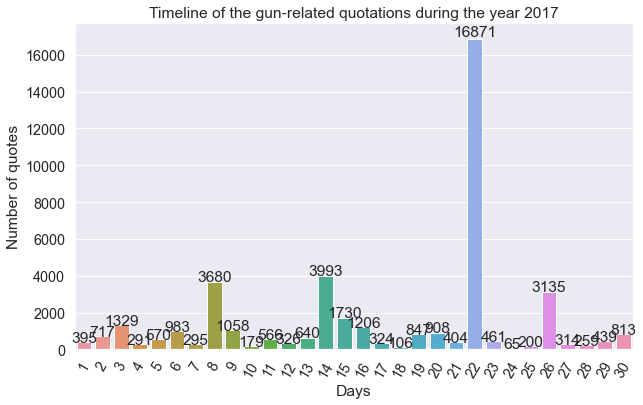

In [11]:
## Plot of the nb of quotes related to guns in function of the date : zoom on JUNE

june = gunquotes[(gunquotes['date'].dt.month == 6)]

ax = sns.barplot(x=np.linspace(1,30,30, dtype='int'), y=june.groupby(june['dateWithoutTime']).numOccurrences.sum())#, data=gunquotes)
sns.color_palette("tab10")
ax.set_xlabel('Days')
ax.set_ylabel('Number of quotes')
ax.set_title('Timeline of the gun-related quotations during the year 2017')
#ax.set_xticklabels(labels=labs)
plt.xticks(rotation=60)
show_values(ax)
plt.show()

## Explanation :
## https://www.nytimes.com/2017/06/26/us/politics/supreme-court-guns-public-california.html
## https://www.pewresearch.org/social-trends/2017/06/22/americas-complex-relationship-with-guns/
## Fusillade de l'entrainement républicain du match de baseball du Congrès le 14 juin 2017 : https://fr.wikipedia.org/wiki/Fusillade_de_l%27entrainement_r%C3%A9publicain_du_match_de_baseball_du_Congr%C3%A8s
## Pizzagate shooters sentenced to 4 years of prison on the 22th of June 2017 : https://edition.cnn.com/2017/06/22/politics/pizzagate-sentencing/index.html

In [12]:
## Trying to understand thee bg amount of data for June 2017

june.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,gender,nationality,occupation,age,ethnic_group,party,religion,dateWithoutTime
17,2017-06-16-140662,"When I saw American Psycho, I felt like: I'm a...",Daniel Kellison,[Q5217783],2017-06-16 14:00:00,1,"[[Daniel Kellison, 0.5011], [None, 0.3671], [K...",[https://www.wired.com/story/kanye-west-puppet...,E,male,[United States of America],[television producer],57.0,None,None,None,2017-06-16
21,2017-06-14-008659,"Apparently, a number of of members of the team...",Evan Jenkins,"[Q5415437, Q56597319]",2017-06-14 23:10:00,11,"[[Evan Jenkins, 0.5416], [None, 0.4339], [Paul...",[http://itemonline.com/cnhi_network/scalise-s-...,E,male,[United States of America],"[politician, lawyer, businessperson, instructor]",61.0,None,"[Republican Party, Democratic Party]",None,2017-06-14
44,2017-06-15-152823,"When I go to states like Arizona, when I go to...",Jedediah Bila,[Q16841387],2017-06-15 19:44:18,1,"[[Jedediah Bila, 0.8488], [Whoopi Goldberg, 0....",[http://rare.us/rare-news/the-media/the-claws-...,E,female,[United States of America],"[writer, journalist, columnist, politician, te...",42.0,None,None,None,2017-06-15
58,2017-06-22-102008,"tax cuts, reducing crime, securing that Second...",Donald Trump,"[Q22686, Q27947481]",2017-06-22 05:49:40,1,"[[Donald Trump, 0.7601], [Karen Handel, 0.1242...",[http://www.whas11.com/news/nation-now/trump-i...,E,male,[United States of America],"[business magnate, investor, restaurateur, non...",75.0,None,"[Republican Party, Independence Party of Ameri...",[Presbyterianism],2017-06-22
67,2017-06-09-123612,Those hoping for fireworks or a smoking gun ma...,Jim Banks,[Q16146788],2017-06-09 09:00:25,7,"[[Jim Banks, 0.8736], [None, 0.1077], [Robert ...",[https://www.nytimes.com/2017/06/09/us/politic...,E,male,[United States of America],"[politician, real estate broker]",42.0,None,[Republican Party],None,2017-06-09


In [1]:
june[(june.quotation.str.contains('Pizzagate'))].numOccurrences.sum()
# june[(june.quotation.str.contains('sentence'))].quotation.iloc[3]
# june[([(june.date.dt.normalize() == '2017-06-22')].quotation.str.contains('murder'))]

NameError: name 'june' is not defined

## Timeline on both Americans and non-Americans 'gun quotes'

Idée : créer un dataframe par mois (index 1 à 12), nb parlant guns, nb parlant pas guns, American ou pas <br>
créer 1 dataframe avec tous les parlant guns, 
=> rajouter 1 colonne parlant guns, 1 colonne nationalités

In [ ]:
def process_chunk(chunk):
        print(f'Processing chunk with {len(chunk)} rows')
        #display(chunk)

nblines_totquotes = 0
nbtot_totquotes = 0
with pd.read_json('data/quotes-2017.json.bz2', lines=True, compression='bz2', chunksize=10000) as df_reader:
    for chunk in df_reader:
        process_chunk(chunk)
        nblines_totquotes = nblines_totquotes + chunk.shape[0]
        nbtot_totquotes = nbtot_totquotes + chunk['numOccurences'].sum()

In [ ]:
lexical_field = ['gun','firearm','mass shooting','2nd Amendment','murder','homicide','gun shot','armed robbery','rifles','Second Amendment','Columbine', 'gun control']

speakers = pd.read_parquet(data_folder + 'speaker_attributes.parquet')
label = pd.read_csv(data_folder + 'wikidata_labels_descriptions_quotebank.csv.bz2', compression='bz2', index_col='QID')

In [ ]:
path_to_file = data_folder + 'quotes-2017.json.bz2' 
path_to_out = data_folder + 'quotes-2017-extended.json.bz2'

iter = 0

with bz2.open(path_to_file, 'rb') as s_file:
    with bz2.open(path_to_out, 'wb') as d_file:
        for instance in s_file:
            instance = json.loads(instance) # loading a sample
            iter += 1
            if any(substring.lower() in instance['quotation'].lower() for substring in lexical_field) and instance['qids'] != []: #We keep only quotation containing words of the lexical field and where there is a speaker
                speaker = speakers.loc[speakers['id'] == instance['qids'][0]].squeeze()
                
                if speaker.nationality is not None: 
                    if any(substring == 'Q30' for substring in speaker.nationality): #keep american speaker

                        #We add the gender
                        if speaker.gender is not None:
                            instance['gender'] = 'male' if (speaker['gender'][0] == 'Q6581097') else 'female' 
                        else:
                            instance['gender'] = None
                            
                        #We add the nationalities
                        instance['nationality'] = []
                        for i in speaker['nationality']: 
                            nat = label.loc[i]['Label']
                            instance['nationality'].append(nat)

                        #We add the occupations
                        if speaker.occupation is not None:
                            instance['occupation'] = []
                            for i in speaker['occupation']:
                                occ = label.loc[i]['Label']
                                instance['occupation'].append(occ)
                        else:
                            instance['occupation'] = None

                        #We add the date of birth
                        try:
                            born = datetime.strptime(speaker.date_of_birth[0][1:11], "%Y-%m-%d").date()
                            today = date.today()
                            age = today.year - born.year - ((today.month, today.day) < (born.month, born.day))
                        except:
                            age = None
                        instance['age'] = age

                        #We add the ethnic group
                        if speaker.ethnic_group is not None:
                            instance['ethnic_group'] = []
                            for i in speaker['ethnic_group']:
                                ethnic = label.loc[i]['Label']
                                instance['ethnic_group'].append(ethnic)
                        else:
                            instance['ethnic_group'] = None

                        #We add the party
                        if speaker.party is not None:
                            instance['party'] = []
                            for i in speaker['party']:
                                part = label.loc[i]['Label']
                                instance['party'].append(part)
                        else:
                            instance['party'] = None

                        #We add the religion
                        if speaker.religion is not None:
                            instance['religion'] = []
                            for i in speaker['religion']:
                                relig = label.loc[i]['Label']
                                instance['religion'].append(relig)
                        else:
                            instance['religion'] = None

                        d_file.write((json.dumps(instance)+'\n').encode('utf-8')) # writing in the new file
  
            #to test
            # if iter > 100000:
            #     break

## Old tests 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

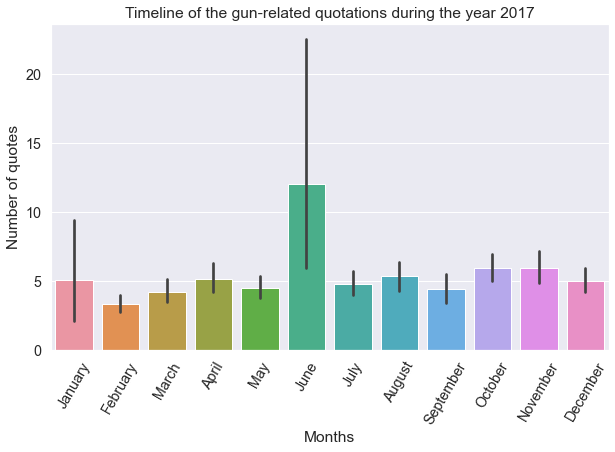

In [96]:
# Plot of the nb of quotes related to guns in function of the month
gunquotes['dateWithoutTime'] = gunquotes['date'].dt.normalize()
ax = sns.barplot(x=gunquotes["dateWithoutTime"].dt.month, y="numOccurrences", data=gunquotes)
ax.set_xlabel('Months')
ax.set_ylabel('Number of quotes')
ax.set_title('Timeline of the gun-related quotations during the year 2017')
ax.set_xticklabels(labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

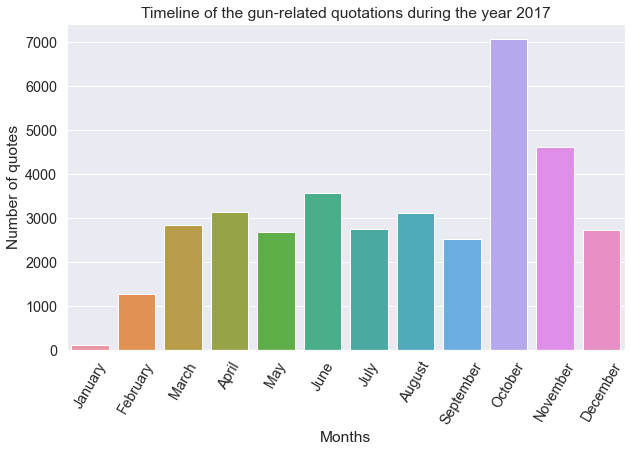

In [99]:
# Plot of the nb of quotes related to guns in function of the month
gunquotes['dateWithoutTime'] = gunquotes['date'].dt.normalize()
ax = sns.countplot(x=gunquotes["dateWithoutTime"].dt.month, data=gunquotes)
# y=gunquotes['numOccurrences'].sum()
ax.set_xlabel('Months')
ax.set_ylabel('Number of quotes')
ax.set_title('Timeline of the gun-related quotations during the year 2017')
ax.set_xticklabels(labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xticks(rotation=60)

<AxesSubplot:xlabel='numOccurrences', ylabel='count'>

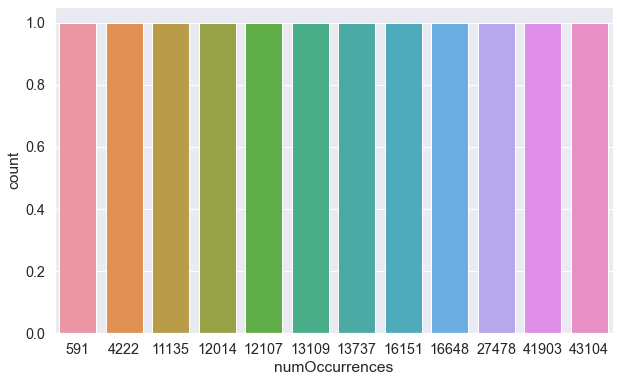

In [130]:
sns.countplot(x=gunquotes.groupby(gunquotes['dateWithoutTime'].dt.month).numOccurrences.sum(), data=gunquotes)

In [74]:
quotes_january = gunquotes[(gunquotes['date'].dt.month==1)]
quotes_january
print(quotes_january['numOccurrences'].sum())

quotes_february = gunquotes[(gunquotes['date'].dt.month==2)]
quotes_february
print(quotes_february['numOccurrences'].sum())

quotes_june = gunquotes[(gunquotes['date'].dt.month==6)]
quotes_june
print(quotes_june['numOccurrences'].sum())
print(quotes_june.shape[0])

591
4222
43104
3581
